## Logistic Regression

###### By: Aaqil Irshad

#### Analyzing the titanic dataset from kaggle.com, using that to predict survival.

Here I'm working on a very famous data set [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). "A semi-cleaned" version of the data is used here.

Towards the end we'll try predict a classification - survival or deceased, by implementing a Logistic Regression for classification.

## Exploratory Data Analysis

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

C:\Users\aaqil\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#reading the trian and test set
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

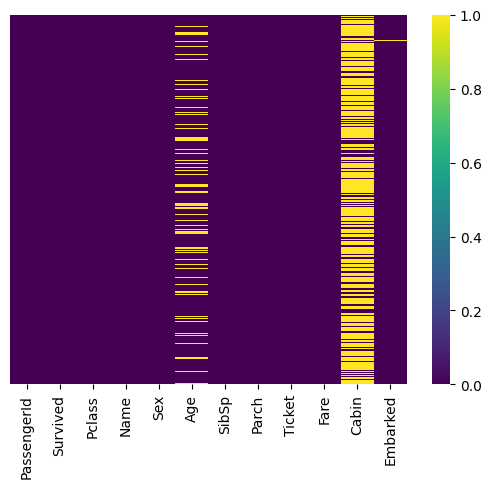

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

Roughly 20% of the Age data is missing, which is reasonable enough for replacement with imputation. Cabin column has many missing values not appropiate to replace the missing values.

<Axes: xlabel='Survived', ylabel='count'>

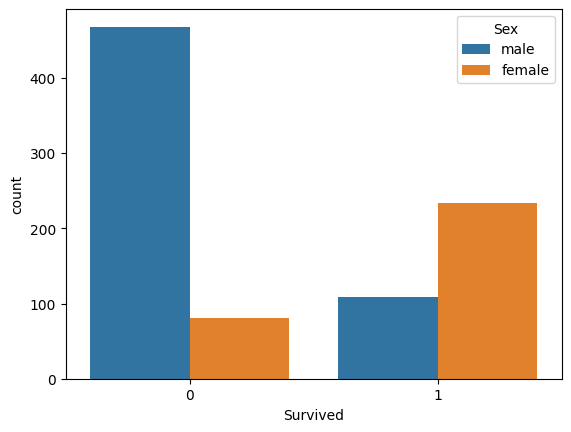

In [7]:
#counts of survived passengres
sns.countplot(train, x='Survived', hue='Sex')

## Data Cleaning

Fill in missing Age values with mean of the age within the class of the passenger

In [8]:
train[['Age', 'Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [9]:
train.groupby('Pclass').mean()['Age'][3.0]

25.14061971830986

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    mean_age = train.groupby('Pclass').mean()['Age']
    if pd.isnull(Age):
        return mean_age[Pclass]  
    else:
        return Age

In [11]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

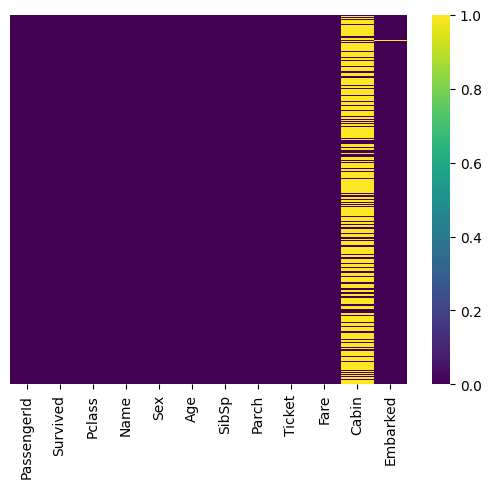

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

Now the Age data is filled in

In [13]:
train.drop('Cabin', axis=1, inplace=True)

In [14]:
train.dropna(inplace=True)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

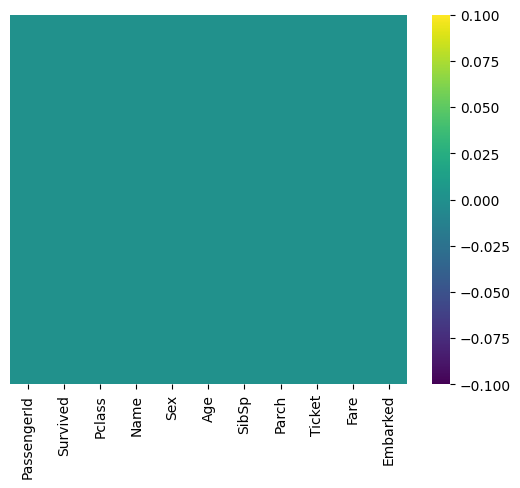

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

#### Converting the Categorical plots

In [17]:
# converting the categorical plots
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [18]:
train = pd.concat([train, sex, embark, pclass], axis=1)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


Dropping the unecessary columns

In [20]:
train.drop(['Pclass', 'Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [22]:
train.drop('PassengerId', axis=1, inplace=True)

### Builing and training a Logistic Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
logmod = LogisticRegression(max_iter=3000)

In [28]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
logmod.fit(X_train,y_train)

C:\Users\aaqil\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=3000)

## Evaluating the Model

In [37]:
predictions = logmod.predict(x_test)

C:\Users\aaqil\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



[[149  14]
 [ 33  71]]


___



### Loading and Cleaning the Unlabeled Data

In [136]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

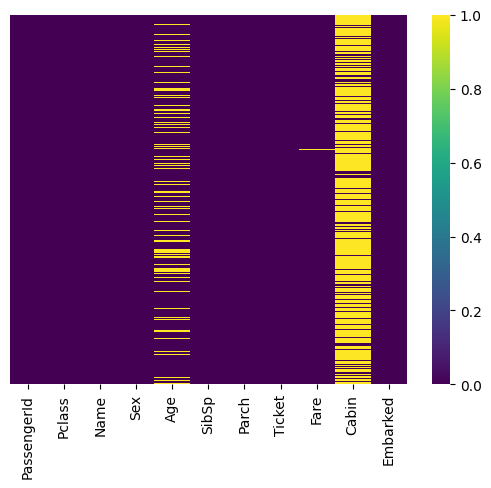

In [125]:
sns.heatmap(test.isnull(), yticklabels=False, cmap='viridis')

In [126]:
test.groupby('Pclass').mean()['Age']

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [127]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    mean_test_age = test.groupby('Pclass').mean()['Age']
    
    if pd.isnull(Age):
        return mean_test_age[Pclass]
    else:
        return Age

In [137]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_test_age, axis=1)

In [138]:
test.drop('Cabin', axis=1, inplace=True)
test.dropna(inplace=True)

In [139]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [140]:
# converting the categorical plots
test_sex = pd.get_dummies(test['Sex'], drop_first=True)
test_embark = pd.get_dummies(test['Embarked'], drop_first=True)
test_pclass = pd.get_dummies(test['Pclass'], drop_first=True)

In [141]:
test = pd.concat([test, test_sex, test_embark, test_pclass], axis=1)

In [142]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [143]:
test.drop(['PassengerId','Pclass', 'Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [144]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [145]:
predictions = logmod.predict(test)

C:\Users\aaqil\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [146]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### End